# Histogram

The histogram is a powerful tool in image processing. It shows the distribution of the intensity values of an image.

## Libraries

The libraries used in this exercise are: ``cv2``, ``numpy`` and ``matplotlib``

In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

## Image

The image used in this exercise is the album cover of Foxtrot by the progressive rock band, Genesis, that came out in 1972.

![Foxtrot album cover](img/foxtrot.jpg)

In [2]:
image = cv2.imread('img/foxtrot.jpg')

## Investigating the image channels

To investigate the channels, it is needed to be broken down on some steps

### Splitting the channels

The first step is to investigate the chanel of it's colour. It is known that the computer renders in three colours: red, blue and green, which is referenced to as [RBG Color model](https://en.wikipedia.org/wiki/RGB_color_model).

In [3]:
blue_channel, green_channel, red_channel = cv2.split(image)

Blue channel

![Blue Channel](img/blue.png)

Green channel

![Blue Channel](img/green.png)

Red channel

![Blue Channel](img/red.png)

### Making the histograms

Next step is to make the histograms for each channel.

In [4]:
def create_histogram(image):
    image_normalized_histogram = cv2.calcHist([image], [0], None, [256], [0, 255])
    return image_normalized_histogram / sum(image_normalized_histogram)

blue_histogram = create_histogram(blue_channel)
green_histogram = create_histogram(green_channel)
red_histogram = create_histogram(red_channel)

### Plotting the histograms

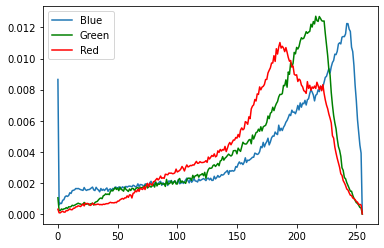

In [5]:
plt.plot(blue_histogram, label="Blue")
plt.plot(green_histogram, label="Green", color="green")
plt.plot(red_histogram, label="Red", color='red')
plt.legend(loc='best')

plt.show()

In the plot, it is noticed that the blue in the cover has more values.

### Histogram equalization

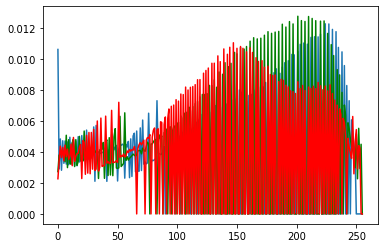

In [6]:
blue_equalized = cv2.equalizeHist(blue_channel)
green_equalized = cv2.equalizeHist(green_channel)
red_equalized = cv2.equalizeHist(red_channel)

blue_equalized_histogram = create_histogram(blue_equalized)
green_equalized_histogram = create_histogram(green_equalized)
red_equalized_histogram = create_histogram(red_equalized)

plt.plot(blue_equalized_histogram, label="Blue")
plt.plot(green_equalized_histogram, label="Green", color="green")
plt.plot(red_equalized_histogram, label="Red", color="red")

plt.show()

In the new plot, more colors appear.

## Synthesize the original

Final step of this exercise is to merge the equalized channels back into one.

In [7]:
synthesized_image = cv2.merge((blue_equalized, green_equalized, red_equalized))

![Merged picture](img/merged.png)

## Source Code

```py
import cv2
import numpy as np


def show_image(image, name):
    cv2.namedWindow(name, cv2.WINDOW_NORMAL)
    cv2.imshow(name, image)    


def create_histogram(image):
    image_normalized_histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    return image_normalized_histogram / sum(image_normalized_histogram)


def show_plots(blue_histogram, green_histogram, red_histogram):
    from matplotlib import pyplot as plt

    plt.plot(blue_histogram, label="Blue")
    plt.plot(green_histogram, label="Green", color="green")
    plt.plot(red_histogram, label="Red", color='red')
    plt.legend(loc='best')

    plt.show()


if __name__ == '__main__':
    image = cv2.imread('img/foxtrot.jpg')

    blue_channel, green_channel, red_channel = cv2.split(image)

    show_image(blue_channel, "Blue Channel")
    show_image(green_channel, "Green Channel")
    show_image(red_channel, "Red Channel")

    cv2.waitKey()
    cv2.destroyAllWindows()

    blue_histogram = create_histogram(blue_channel)
    green_histogram = create_histogram(green_channel)
    red_histogram = create_histogram(red_channel)

    show_plots(blue_histogram, green_histogram, red_histogram)

    blue_equalized = cv2.equalizeHist(blue_channel)
    green_equalized = cv2.equalizeHist(green_channel)
    red_equalized = cv2.equalizeHist(red_channel)

    blue_equalized_histogram = create_histogram(blue_equalized)
    green_equalized_histogram = create_histogram(green_equalized)
    red_equalized_histogram = create_histogram(red_equalized)

    show_plots(blue_equalized_histogram, green_equalized_histogram, red_equalized_histogram)

    synthesized_image = cv2.merge((blue_equalized, green_equalized, red_equalized))

    show_image(synthesized_image, "Merged Image")
    cv2.waitKey()
    cv2.destroyAllWindows()

```